In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

In [5]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.nunique()

id                                38821
name                              38244
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Univariate Analysis Non Graphical 

## Categorical 

In [7]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [ ]:
# percentage 

df['neighbourhood_group'].value_counts(normalize=True)


neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [9]:
df['room_type'].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [10]:
df['room_type'].value_counts(normalize=True)


room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [11]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [12]:
df['neighbourhood'].value_counts(normalize=True)


neighbourhood
Williamsburg          0.081477
Bedford-Stuyvesant    0.080910
Harlem                0.056773
Bushwick              0.050024
Hell's Kitchen        0.039360
                        ...   
Holliswood            0.000052
New Dorp Beach        0.000052
Richmondtown          0.000026
Rossville             0.000026
Willowbrook           0.000026
Name: proportion, Length: 218, dtype: float64

In [14]:
df_n = df['neighbourhood'].value_counts().reset_index()

In [15]:
df_n

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [16]:
df_n[df_n['count']>1000]

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


## Numerical

In [23]:
# bins is use to divide the range to analysis 

df['price'].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

'customise the bins' 

In [ ]:
# define the ranges 

bins = (0,50,100,200,500,2000,10000)

In [25]:
df['price'].value_counts(bins=bins)


(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [27]:
df['price'].mean()

142.33252621004095

In [28]:
df['price'].std()


196.99475591833985

In [31]:
df['price'].skew()


23.673594295123014

In [32]:
df['price'].kurt()


953.4807356344944

# Univariate Analysis Graphical 


In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Categorical

#### Bar Graph

<Axes: xlabel='room_type', ylabel='count'>

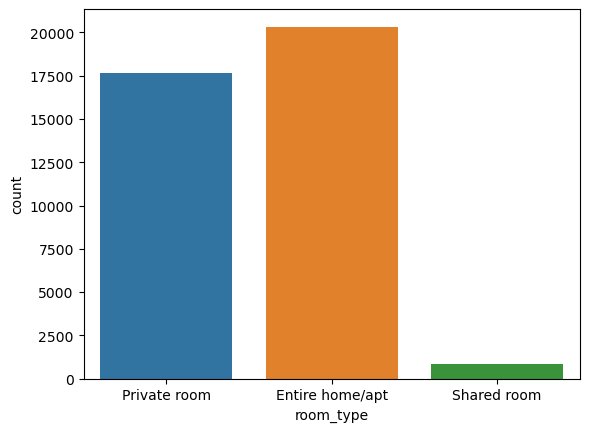

In [35]:
sns.countplot( x=df["room_type"])

<Axes: xlabel='neighbourhood_group', ylabel='count'>

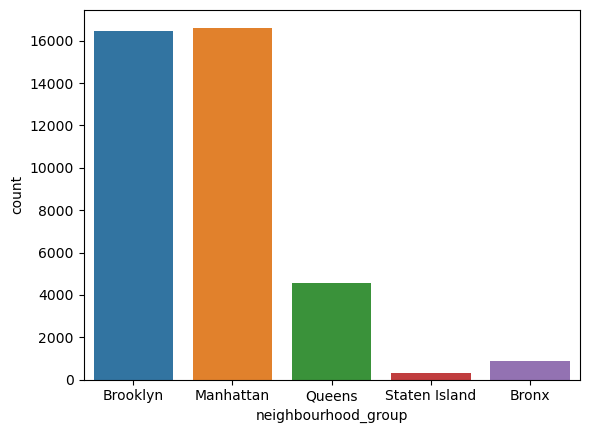

In [36]:
sns.countplot(data=df, x= "neighbourhood_group")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

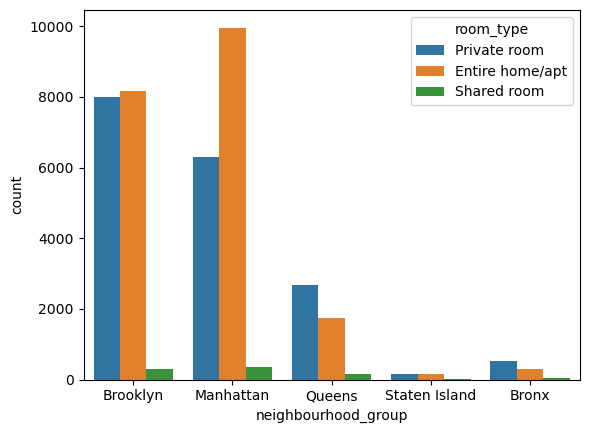

In [37]:
sns.countplot(data = df, x ="neighbourhood_group" , hue = "room_type")

### Pie Chart

<Axes: ylabel='count'>

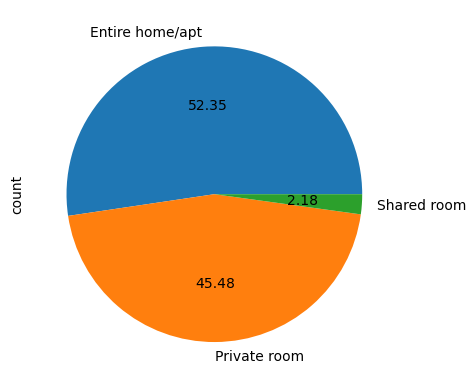

In [38]:
df["room_type"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='availability_365'>

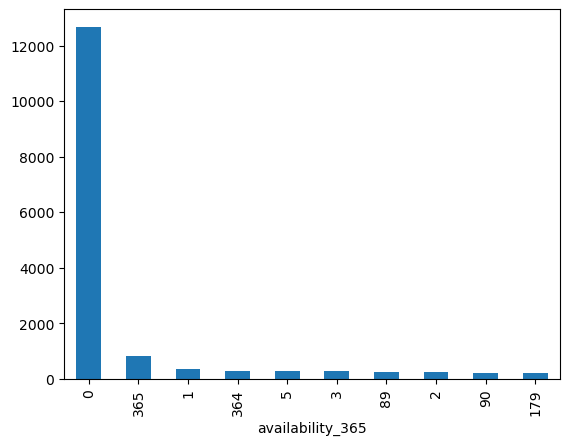

In [39]:
df["availability_365"].value_counts().head(10).plot(kind ="bar")

In [40]:
df2 = sns.load_dataset("titanic")

In [41]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

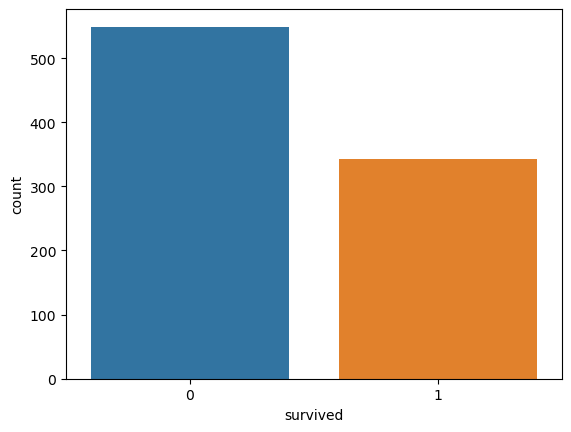

In [42]:
sns.countplot(x = df2["survived"])

<Axes: xlabel='embark_town', ylabel='count'>

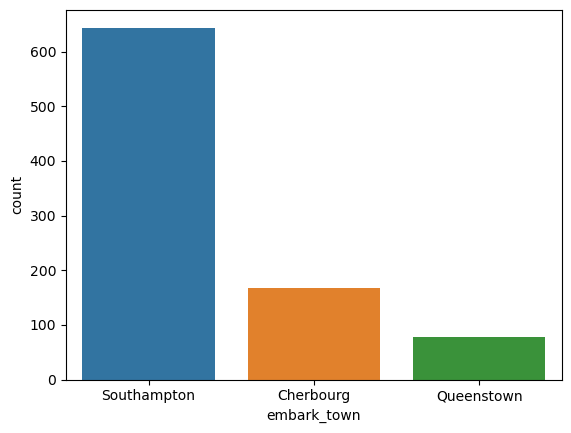

In [43]:
sns.countplot(x = df2["embark_town"])

<Axes: ylabel='count'>

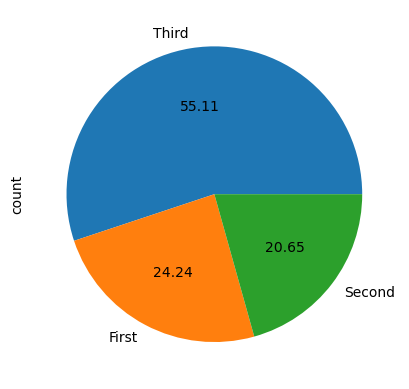

In [44]:
df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='alone', ylabel='count'>

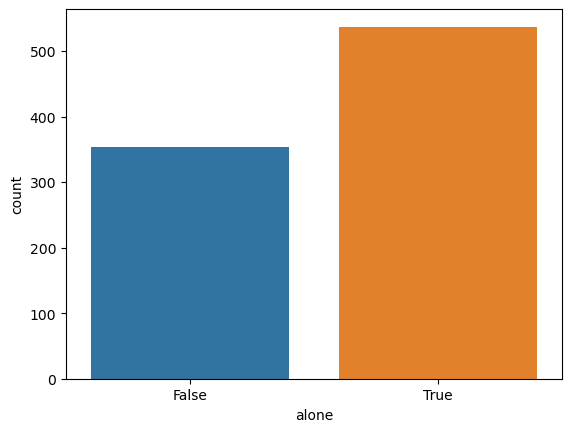

In [45]:
sns.countplot(x = df2["alone"])